In [21]:
from riskeye.utils.data import get_all_behavior, get_all_eyepos_info, get_all_subjects, Subject
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op

target_dir = '/data/ds-riskeye/derivatives/figures'

In [22]:
df = get_all_behavior()

In [23]:
summarized_fixations = get_all_eyepos_info(source='eyepos', summarize=True)
summarized_fixations = summarized_fixations.join(df)
# summarized_fixations['Experiment'] = summarized_fixations.index.get_level_values('exptype').map({'symbolic':'Symbols', 'non-symbolic':'Coin clouds'})

In [24]:
df =summarized_fixations

In [29]:
df['n1'] = df['n_left'].where(df['first_saccade'] == 'left_option', df['n_right'])
df['p1'] = df['p_left'].where(df['first_saccade'] == 'left_option', df['p_right'])
df['n2'] = df['n_left'].where(df['first_saccade'] == 'right_option', df['n_right'])
df['p2'] = df['p_left'].where(df['first_saccade'] == 'right_option', df['p_right'])

In [30]:
df[['first_saccade', 'n1', 'p1', 'n_left', 'p_left', 'n2', 'p2']]

first_saccade    n1    p1  n_left  \
subject run block trial n_saccades exptype                                      
01      1   1     1     6          symbolic   left_option  47.0  0.55    47.0   
                  2     3          symbolic  right_option   5.0  1.00     6.0   
                  3     2          symbolic   left_option  17.0  0.55    17.0   
                  4     1          symbolic  right_option  10.0  1.00    12.0   
                  5     1          symbolic  right_option  14.0  1.00    28.0   
...                                                   ...   ...   ...     ...   
64      5   4     20    2          symbolic  right_option  79.0  0.55    28.0   
                  21    3          symbolic   left_option  20.0  1.00    20.0   
                  22    3          symbolic   left_option  10.0  1.00    10.0   
                  23    2          symbolic   left_option  20.0  1.00    20.0   
                  24    3          symbolic   left_option  28.0  1.00    28.0   

                                             p_left    n2    p2  
subject run block trial n_saccades exptype                       
01      1   1     1     6          symbolic    0.55  14.0  1.00  
                  2     3          symbolic    0.55   6.0  0.55  
                  3     2          symbolic    0.55  14.0  1.00  
                  4     1          symbolic    0.55  12.0  0.55  
                  5     1          symbolic    0.55  28.0  0.55  
...                                             ...   ...   ...  
64      5   4     20    2          symbolic    1.00  28.0  1.00  
                  21    3          symbolic    1.00  57.0  0.55  
                  22    3          symbolic    1.00  20.0  0.55  
                  23    2          symbolic    1.00  40.0  0.55  
                  24    3          symbolic    1.00  29.0  0.55  

[29394 rows x 7 columns]

In [8]:
summarized_fixations['']

subject  run  block  trial  n_saccades  exptype 
01       1    1      1      6           symbolic     left_option
                     2      3           symbolic    right_option
                     3      2           symbolic     left_option
                     4      1           symbolic    right_option
                     5      1           symbolic    right_option
                                                        ...     
64       5    4      20     2           symbolic    right_option
                     21     3           symbolic     left_option
                     22     3           symbolic     left_option
                     23     2           symbolic     left_option
                     24     3           symbolic     left_option
Name: first_saccade, Length: 29394, dtype: object

In [5]:
summarized_fixations['first_saccade']

subject  run  block  trial  n_saccades  exptype 
01       1    1      1      6           symbolic     left_option
                     2      3           symbolic    right_option
                     3      2           symbolic     left_option
                     4      1           symbolic    right_option
                     5      1           symbolic    right_option
                                                        ...     
64       5    4      20     2           symbolic    right_option
                     21     3           symbolic     left_option
                     22     3           symbolic     left_option
                     23     2           symbolic     left_option
                     24     3           symbolic     left_option
Name: first_saccade, Length: 29394, dtype: object

In [230]:
order = ['Coin clouds', 'Symbols']

palette = sns.color_palette()[-3:]

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1934031607.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  p = sns.histplot(data=summarized_fixations.reset_index(), x='n_saccades', hue='Experiment', bins=np.arange(-.5, 9.5, 1), multiple="dodge", shrink=.85, stat='percent', palette=sns.color_palette()[-3:], hue_order=order, legend=False)


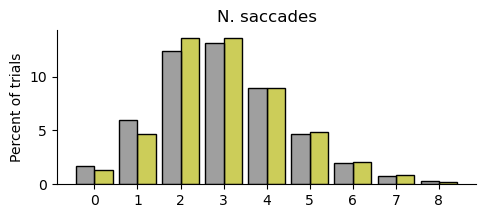

In [125]:
summarized_fixations
p = sns.histplot(data=summarized_fixations.reset_index(), x='n_saccades', hue='Experiment', bins=np.arange(-.5, 9.5, 1), multiple="dodge", shrink=.85, stat='percent', palette=sns.color_palette()[-3:], hue_order=order, legend=False)
p.set_ylabel('Percent of trials')
p.set_title('N. saccades')
p.set_xlabel(None)
p.set_xticks(np.arange(0, 9))

p.set_aspect(1/4.)
sns.despine()

p.figure.set_size_inches(6., 2.)
p.figure.savefig(op.join(target_dir, 'n_saccades_hist.pdf'), bbox_inches='tight')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/519971704.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.swarmplot(x='Experiment', hue='Experiment', y='n_saccades', data=summarized_fixations.reset_index().groupby(['subject', 'Experiment']).mean().reset_index(), legend=False, palette=sns.color_palette()[-3:], order=order)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/519971704.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.swarmplot(x='Experiment', hue='Experiment', y='n_saccades', data=summarized_fixations.reset_index().groupby(['subject', 'Experiment']).mean().reset_index(), legend=False, palette=sns.color_palette()[-3:], order=order)
/Users/gdehol/mambaforge/lib/python3.10/site-packag

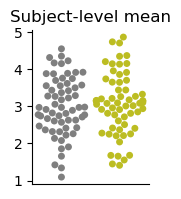

In [101]:
g = sns.swarmplot(x='Experiment', hue='Experiment', y='n_saccades', data=summarized_fixations.reset_index().groupby(['subject', 'Experiment']).mean().reset_index(), legend=False, palette=sns.color_palette()[-3:], order=order)
sns.despine()
plt.gcf().set_size_inches(1.5, 2.)
plt.xticks([]) 
plt.xlabel(None) 
plt.ylabel(None)
plt.title('Subject-level mean')

plt.savefig(op.join(target_dir, 'n_saccades_mean.pdf'), bbox_inches='tight')

In [49]:
def merge_fixations(d):
    d['previous_fixation_target'] = d['fixation_target'].shift(1)

    result = []

    n = 1
    duration = 0.0

    for ix, row in d.iterrows():
        if (row.fixation_target == row['previous_fixation_target']) or (pd.isnull(row.previous_fixation_target)):
            duration += row.duration
        else:
            result.append({'duration':duration, 'fixation_target':row.previous_fixation_target})
            duration = row.duration
            n += 1

    if duration != 0:
        result.append({'duration':duration, 'fixation_target':row.fixation_target})

    return pd.DataFrame(result, index=pd.Index(np.arange(1, n+1), name='n'))



In [50]:
fixations = get_all_eyepos_info(source='eyepos', summarize=False)

In [51]:
fixations = fixations[np.in1d(fixations['fixation_target'], ['left_option', 'right_option'])].droplevel('n')

fixations = fixations.groupby(['subject', 'run', 'block', 'trial']).apply(merge_fixations)

In [52]:
df['EV_left'] = df['p_left'] * df['n_left']
df['EV_right'] = df['p_right'] * df['n_right']
fixations = fixations.join(df[['EV_left', 'EV_right', 'n_safe', 'n_risky', 'n_left', 'n_right', 'chose_risky', 'log(risky/safe)']])
fixations = fixations.join((df['p_left'] == 0.55).to_frame('risky_left'))

fixations['risky_left'] = fixations['risky_left'].astype(bool)
fixations['chose_risky'] = fixations['chose_risky'].astype(bool)

fixations['risky_fixation'] = ((fixations['fixation_target'] == 'left_option') & fixations['risky_left']) | ((fixations['fixation_target'] == 'right_option') & ~fixations['risky_left'])
fixations['left_fixation'] = (fixations['fixation_target'] == 'left_option')

fixations['safe_fixation'] = ~fixations['risky_fixation'] 
fixations['chosen_fixation'] = (fixations['chose_risky']  & fixations['risky_fixation']) | (~fixations['chose_risky'] & fixations['safe_fixation'])

In [58]:
fixations['Experiment'] = fixations.index.get_level_values('exptype').map({'symbolic':'Symbols', 'non-symbolic':'Coin clouds'})

In [59]:
last_fixations = fixations.groupby(['subject', 'exptype', 'run', 'block', 'trial']).apply(lambda d: d.reset_index('n').iloc[-1])
last_fixations['n'] = 'last'
last_fixations.set_index('n', append=True, inplace=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/812363572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'Experiment', 'n']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/812363572.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = pd.concat((tmp.query('n < 6'), last_fixations.groupby(['subject', 'Experiment', 'n']).mean()))


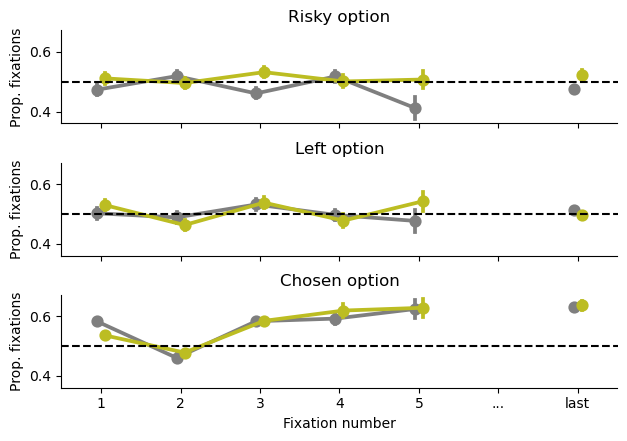

In [129]:
tmp = fixations.groupby(['subject', 'Experiment', 'n']).mean()
tmp = pd.concat((tmp.query('n < 6'), last_fixations.groupby(['subject', 'Experiment', 'n']).mean()))
# tmp = pd.concat((tmp, pd.DataFrame({'subject':np.nan, 'Experiment':['Coin clouds', 'Symbols'], 'n':'...'}).set_index(tmp.index.names)))
# sns.catplot(data=tmp.reset_index(), x='n', y='risky_fixation', hue='Experiment', kind='point', errorbar='se', order=[1,2,3,'...', 'last'], palette=palette)
# plt.ylim(.4, .6)
# plt.axhline(0.5, c='k', ls='--')


tmp.columns.name = 'fixation'
tmp = tmp[['risky_fixation', 'left_fixation', 'chosen_fixation']].stack().to_frame('value').reset_index()

tmp['fixation'] = tmp['fixation'].map({'risky_fixation':'Risky option', 'left_fixation':'Left option', 'chosen_fixation':'Chosen option'})


g = sns.catplot(data=tmp.reset_index(), x='n', y='value', row='fixation', hue='Experiment', kind='point', errorbar='se', order=[1, 2, 3, 4, 5,  '...', 'last'], palette=palette, aspect=4.25, height=1.5, sharey=True, legend=False, dodge=.1)

g.set(xlabel='Fixation number', ylabel='Prop. fixations')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set_titles('{row_name}', size=12)

g.savefig(op.join(target_dir, 'fixations_of_n.pdf'))

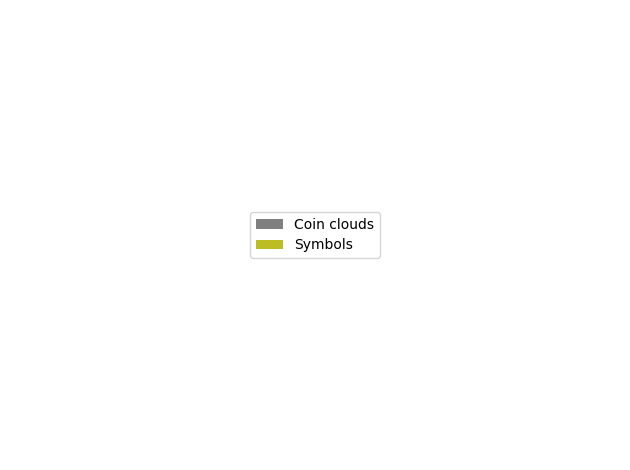

In [142]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Patch(facecolor=palette[0], label=order[0]),
                   Patch(facecolor=palette[1], label=order[1]),]

# Create the figure
fig, ax = plt.subplots()
plt.legend(handles=legend_elements, loc='center')
# recompute the ax.dataLim
plt.axis('off')
plt.tight_layout()

plt.savefig(op.join(target_dir, 'legend_exp.pdf'), bbox_inches='tight', transparent=True)

In [143]:
fixations['EV_fixated'] = fixations['EV_left'].where(fixations['left_fixation'], fixations['EV_right'])
fixations['n_fixated'] = fixations['n_left'].where(fixations['left_fixation'], fixations['n_right'])

fixations['EV_risky'] = fixations['EV_left'].where(fixations['risky_left'], fixations['EV_right'])
fixations['EV_safe'] = fixations['EV_left'].where(~fixations['risky_left'], fixations['EV_right'])

fixations['bin(EV_fixated)'] = pd.cut(fixations['EV_fixated'], bins=np.arange(0, 120, 5))
fixations['bin(EV_fixated)'].cat.categories = [bin.mid for bin in fixations['bin(EV_fixated)'].cat.categories]

fixations['bin(EV_left)'] = pd.cut(fixations['EV_left'], bins=np.arange(0, 120, 5))
fixations['bin(EV_left)'].cat.categories = [bin.mid for bin in fixations['bin(EV_left)'].cat.categories]

fixations['bin(EV_risky)'] = pd.cut(fixations['EV_risky'], bins=np.arange(0, 120, 10))
fixations['bin(EV_risky)'].cat.categories = [bin.mid for bin in fixations['bin(EV_risky)'].cat.categories]

fixations['bin(log(risky/safe))'] = pd.qcut(fixations['log(risky/safe)'], q=7)
fixations['bin(log(risky/safe))'].cat.categories = [bin.mid for bin in fixations['bin(log(risky/safe))'].cat.categories]

last_fixations = fixations.groupby(['subject', 'exptype', 'run', 'block', 'trial']).apply(lambda d: d.reset_index('n').iloc[-1])
last_fixations['n'] = 'last'
last_fixations.set_index('n', append=True, inplace=True)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/148358880.py:8: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  fixations['bin(EV_fixated)'].cat.categories = [bin.mid for bin in fixations['bin(EV_fixated)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/148358880.py:11: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  fixations['bin(EV_left)'].cat.categories = [bin.mid for bin in fixations['bin(EV_left)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/148358880.py:14: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  fixations['bin(EV_risky)'].cat.categories = [bin.mid for bin in fixations['bin(EV_risky)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipyke

In [158]:
sns.choose_cubehelix_palette()

palette_risky = sns.cubehelix_palette(n_colors=3, start=.75, hue=1., light=.7, dark=0.0, rot=0.0, reverse=True)
palette_safe = sns.cubehelix_palette(n_colors=3, start=1.9, hue=1., light=.7, dark=0.0, rot=0.0, reverse=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1822505951.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'Experiment']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1822505951.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'EV_safe', 'n', 'Experiment']).mean()


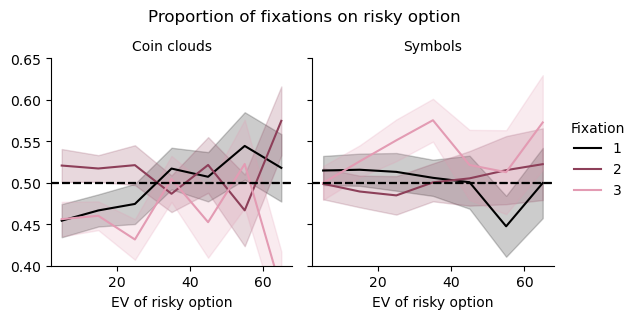

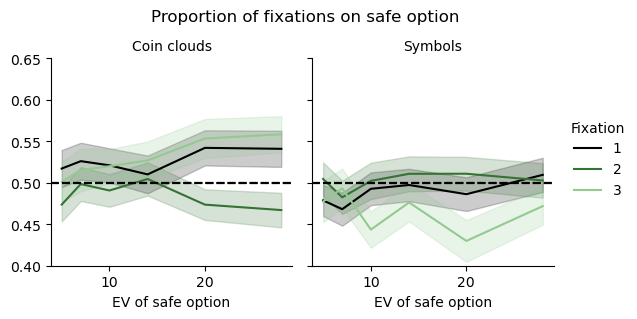

In [214]:
tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'Experiment']).mean()

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='Experiment', hue='n', palette=palette_risky, col_order=order)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'risky_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set(ylabel=None, xlabel='EV of risky option', ylim=(.4, .65))
g.fig.suptitle("Proportion of fixations on risky option", y=1.05)
g.legend.set_title('Fixation')

g.savefig(op.join(target_dir, 'prop_fixation_absolute_EV_risky.pdf'))

tmp = fixations.groupby(['subject', 'EV_safe', 'n', 'Experiment']).mean()
g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='Experiment', hue='n', palette=palette_safe, col_order=order)#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'safe_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set(ylabel=None, xlabel='EV of safe option', ylim=(.4, .65))
g.fig.suptitle("Proportion of fixations on safe option", y=1.05)
g.legend.set_title('Fixation')
g.savefig(op.join(target_dir, 'prop_fixation_absolute_EV_safe.pdf'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/2280913261.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'Experiment']).mean()


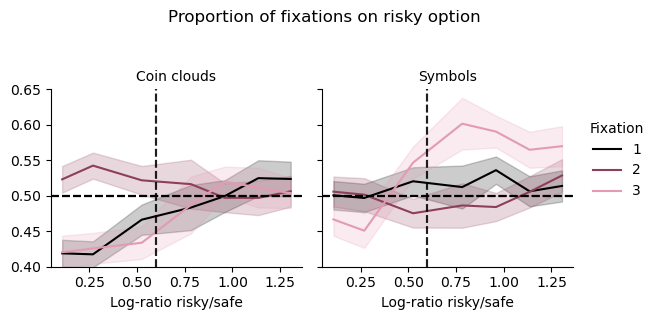

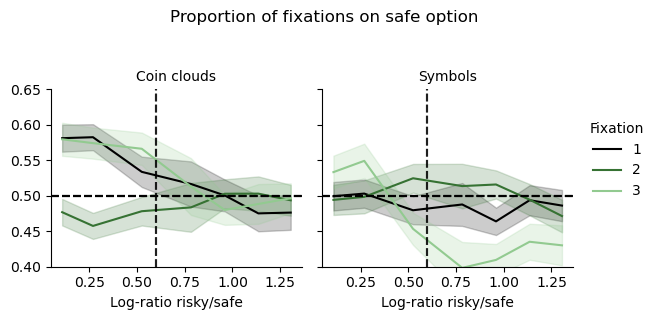

In [261]:
tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'Experiment']).mean()

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='Experiment', hue='n', palette=palette_risky, col_order=order)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'risky_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set(ylabel=None, xlabel='Log-ratio risky/safe', ylim=(.4, .65))
g.fig.suptitle("Proportion of fixations on risky option", y=1.05,)
g.legend.set_title('Fixation')
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--', alpha=.5))
g.savefig(op.join(target_dir, 'prop_fixation_relative_EV_risky.pdf'))

g = sns.FacetGrid(tmp.query('(n < 4)').reset_index(), col='Experiment', hue='n', palette=palette_safe, col_order=order)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'safe_fixation', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axhline(.5, c='k', ls='--'))
g.set(ylabel=None, xlabel='Log-ratio risky/safe', ylim=(.4, .65))
g.fig.suptitle("Proportion of fixations on safe option", y=1.05)
g.legend.set_title('Fixation')
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--', alpha=.5))

g.savefig(op.join(target_dir, 'prop_fixation_relative_EV_safe.pdf'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/3404257126.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  summarized_fixations['bin(log(risky/safe))'].cat.categories = [bin.mid for bin in summarized_fixations['bin(log(risky/safe))'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/3404257126.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = summarized_fixations.reset_index('n_saccades').groupby(['subject', 'Experiment', 'bin(log(risky/safe))']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/3404257126.py:6: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(x='bin(log(risky/s

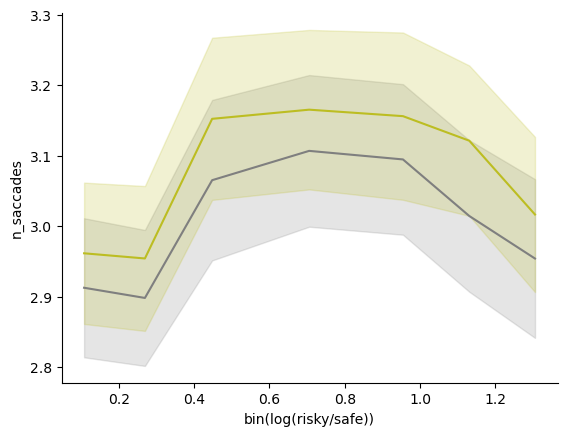

In [202]:
summarized_fixations['bin(log(risky/safe))'] = pd.qcut(summarized_fixations['log(risky/safe)'], q=7)
summarized_fixations['bin(log(risky/safe))'].cat.categories = [bin.mid for bin in summarized_fixations['bin(log(risky/safe))'].cat.categories]
tmp = summarized_fixations.reset_index('n_saccades').groupby(['subject', 'Experiment', 'bin(log(risky/safe))']).mean()


sns.lineplot(x='bin(log(risky/safe))', y='n_saccades', hue='Experiment', data=tmp.reset_index(), palette=sns.color_palette()[-3:], hue_order=order, legend=False, errorbar='se')
sns.despine()

# Durations for different fixations

In [219]:
fixations['duration'].clip(0, 1000, inplace=True)

In [233]:
tmp

duration    EV_left   EV_right  \
subject bin(EV_risky) n Experiment                                      
01      5.0           1 Coin clouds  537.369565   7.100543   7.250543   
                        Symbols      464.750000   7.114205   7.190341   
                      2 Coin clouds  427.120879   7.106044   7.220330   
                        Symbols      371.525000   6.992500   7.081875   
                      3 Coin clouds  354.346667   7.370667   7.155333   
...                                         ...        ...        ...   
64      65.0          1 Symbols      404.800000  54.880000  34.720000   
                      2 Coin clouds  389.500000  53.200000  36.400000   
                        Symbols      466.500000  53.200000  36.400000   
                      3 Coin clouds  275.333333  50.400000  39.200000   
                      4 Coin clouds  306.000000  61.600000  28.000000   

                                        n_safe     n_risky      n_left  \
subject bin(EV_risky) n Experiment                                       
01      5.0           1 Coin clouds   7.739130   12.021739   10.108696   
                        Symbols       7.704545   12.000000   10.136364   
                      2 Coin clouds   7.714286   12.021978   10.087912   
                        Symbols       7.550000   11.862500    9.850000   
                      3 Coin clouds   7.786667   12.253333   10.466667   
...                                        ...         ...         ...   
64      65.0          1 Symbols      28.000000  112.000000   95.200000   
                      2 Coin clouds  28.000000  112.000000   91.000000   
                        Symbols      28.000000  112.000000   91.000000   
                      3 Coin clouds  28.000000  112.000000   84.000000   
                      4 Coin clouds  28.000000  112.000000  112.000000   

                                       n_right  chose_risky  log(risky/safe)  \
subject bin(EV_risky) n Experiment                                             
01      5.0           1 Coin clouds   9.652174     0.239130         0.447697   
                        Symbols       9.568182     0.318182         0.450085   
                      2 Coin clouds   9.648352     0.241758         0.450613   
                        Symbols       9.562500     0.325000         0.458382   
                      3 Coin clouds   9.573333     0.266667         0.461149   
...                                        ...          ...              ...   
64      65.0          1 Symbols      44.800000     0.800000         1.386294   
                      2 Coin clouds  49.000000     0.500000         1.386294   
                        Symbols      49.000000     0.750000         1.386294   
                      3 Coin clouds  56.000000     0.666667         1.386294   
                      4 Coin clouds  28.000000     1.000000         1.386294   

                                     risky_left  risky_fixation  \
subject bin(EV_risky) n Experiment                                
01      5.0           1 Coin clouds    0.554348        0.673913   
                        Symbols        0.556818        0.556818   
                      2 Coin clouds    0.549451        0.329670   
                        Symbols        0.537500        0.450000   
                      3 Coin clouds    0.560000        0.640000   
...                                         ...             ...   
64      65.0          1 Symbols        0.800000        0.000000   
                      2 Coin clouds    0.750000        0.500000   
                        Symbols        0.750000        1.000000   
                      3 Coin clouds    0.666667        0.333333   
                      4 Coin clouds    1.000000        1.000000   

                                     left_fixation  safe_fixation  \
subject bin(EV_risky) n Experiment                                  
01      5.0           1 Coin clouds       0.684783       0.326087   
      

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1714601785.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'Experiment', 'risky_fixation']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1714601785.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1714601785.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subj

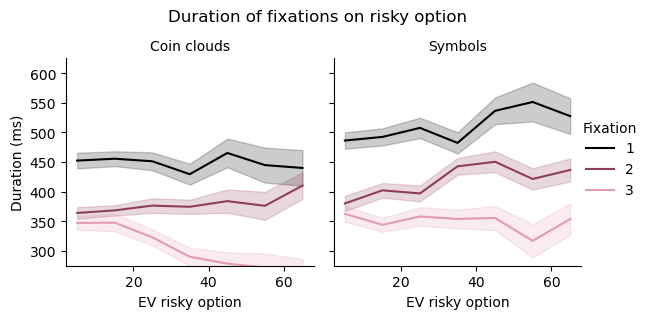

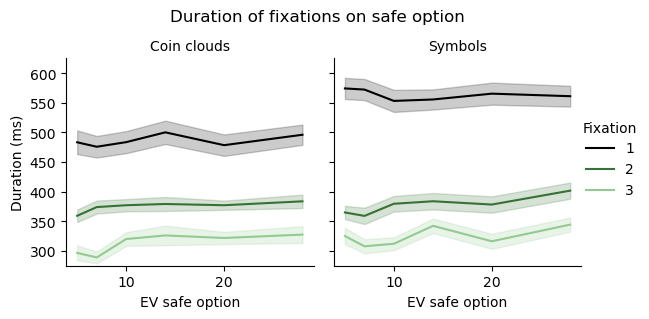

In [313]:
tmp = fixations.groupby(['subject', 'bin(EV_risky)', 'n', 'Experiment', 'risky_fixation']).mean()
tmp = tmp[~tmp.isnull().any(1)]

g = sns.FacetGrid(tmp.query('(n < 4) & risky_fixation').reset_index(), col='Experiment', hue='n', palette=palette_risky)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.legend.set_title('Fixation')
g.set(ylabel='Duration (ms)', xlabel='EV risky option', ylim=(275, 625))
g.fig.suptitle("Duration of fixations on risky option", y=1.05,)
g.savefig(op.join(target_dir, 'fixation_duration_absolute_EV_risky.pdf'))

tmp = fixations.groupby(['subject', 'EV_safe', 'n', 'Experiment', 'safe_fixation']).mean()
g = sns.FacetGrid(tmp.query('(n < 4) & safe_fixation').reset_index(), col='Experiment', hue='n', palette=palette_safe)#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.legend.set_title('Fixation')
g.set(ylabel='Duration (ms)', xlabel='EV safe option', ylim=(275, 625))
g.fig.suptitle("Duration of fixations on safe option", y=1.05,)

g.savefig(op.join(target_dir, 'fixation_duration_absolute_EV_safe.pdf'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1656717084.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(fixations.groupby(['subject', 'n', 'Experiment']).mean().reset_index(), x='n', y='duration', hue='Experiment', palette=palette)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1656717084.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.lineplot(fixations.groupby(['subject', 'n', 'Experiment']).mean().reset_index(), x='n', y='duration', hue='Experiment', palette=palette)


<Axes: xlabel='n', ylabel='duration'>

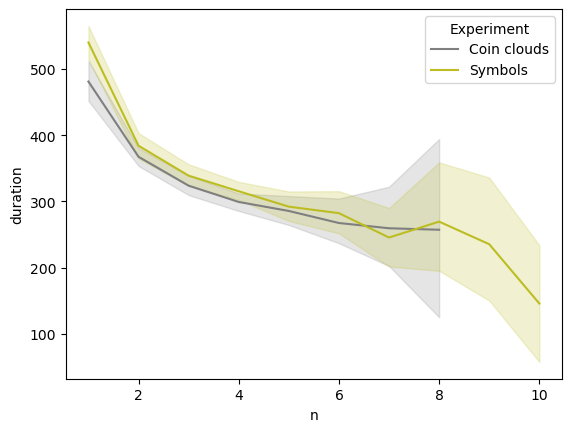

In [311]:
sns.lineplot(fixations.groupby(['subject', 'n', 'Experiment']).mean().reset_index(), x='n', y='duration', hue='Experiment', palette=palette)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/3778401031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'Experiment', 'risky_fixation']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/3778401031.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/3778401031.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = fixations.groupby

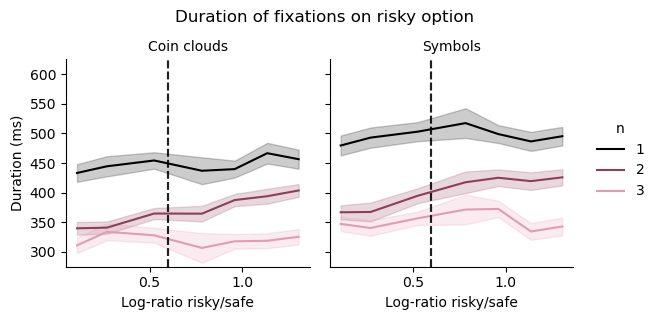

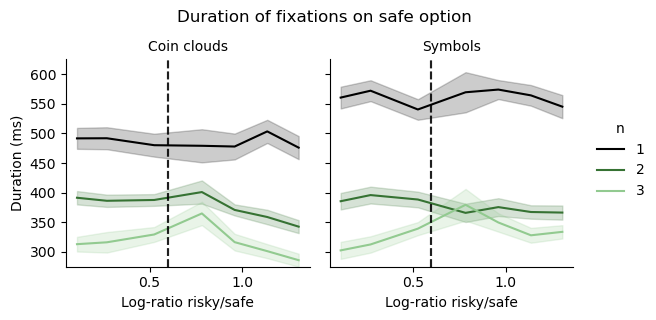

In [314]:
tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'Experiment', 'risky_fixation']).mean()
tmp = tmp[~tmp.isnull().any(1)]


g = sns.FacetGrid(tmp.query('(n < 4)  & risky_fixation').reset_index(), col='Experiment', hue='n', palette=palette_risky)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'duration', errorbar='se')
g.add_legend()
g.set_titles('{col_name}')
g.set(ylabel='Duration (ms)', xlabel='Log-ratio risky/safe', ylim=(275, 625))
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--', alpha=.5))
g.fig.suptitle("Duration of fixations on risky option", y=1.05,)


g.savefig(op.join(target_dir, 'fixation_duration_relative_EV_risky.pdf'))

tmp = fixations.groupby(['subject', 'bin(log(risky/safe))', 'n', 'Experiment', 'safe_fixation']).mean()
g = sns.FacetGrid(tmp.query('(n < 4) & safe_fixation').reset_index(), col='Experiment', hue='n', palette=palette_safe)#, palette='coolwarm')
g.map(sns.lineplot, 'bin(log(risky/safe))', 'duration', errorbar='se')
g.set(ylabel='Duration (ms)', xlabel='Log-ratio risky/safe', ylim=(275, 625))
g.add_legend()
g.set_titles('{col_name}')
g.map(lambda *args, **kwargs: plt.axvline(np.log(1./.55), c='k', ls='--', alpha=.5))
g.fig.suptitle("Duration of fixations on safe option", y=1.05,)

g.savefig(op.join(target_dir, 'fixation_duration_relative_EV_safe.pdf'))

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/735866760.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp =fixations.groupby(['subject', 'Experiment', 'n', 'chose_risky', 'risky_fixation']).mean()


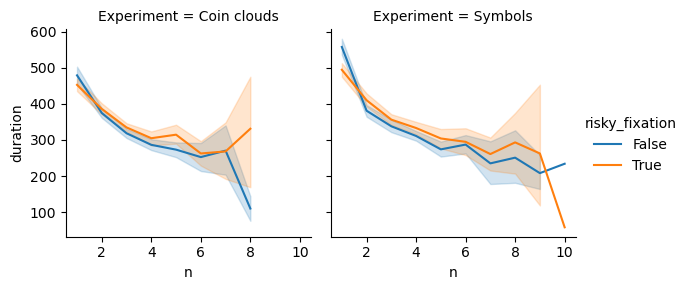

In [320]:
tmp =fixations.groupby(['subject', 'Experiment', 'n', 'chose_risky', 'risky_fixation']).mean()
g = sns.FacetGrid(hue='risky_fixation', data=tmp.reset_index(), col='Experiment')
g.map(sns.lineplot, 'n', 'duration',)
g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2314637892.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'bin(EV_risky)', 'exptype']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2314637892.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  tmp = tmp[~tmp.isnull().any(1)]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_95352/2314637892.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = last_fixations.groupby(['subject', 'EV_safe',

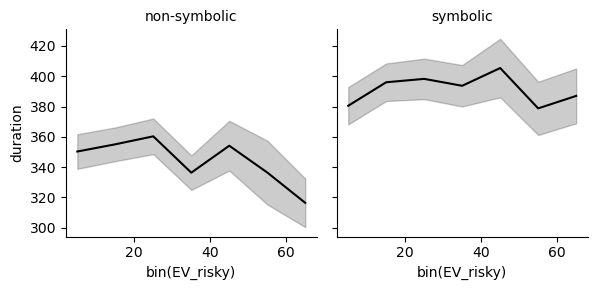

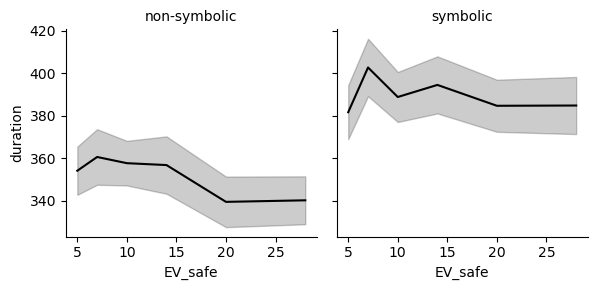

In [114]:
tmp = last_fixations.groupby(['subject', 'bin(EV_risky)', 'exptype']).mean()
tmp = tmp[~tmp.isnull().any(1)]


g = sns.FacetGrid(tmp.reset_index(), col='exptype')#, palette='coolwarm')
g.map(sns.lineplot, 'bin(EV_risky)', 'duration', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')


tmp = last_fixations.groupby(['subject', 'EV_safe', 'exptype']).mean()
g = sns.FacetGrid(tmp.reset_index(), col='exptype')#, palette='coolwarm')
g.map(sns.lineplot, 'EV_safe', 'duration', errorbar='se', color='k')
g.add_legend()
g.set_titles('{col_name}')

# Proportional dwell time

In [273]:
summarized_fixations['EV_left'] = summarized_fixations['p_left'] * summarized_fixations['n_left']
summarized_fixations['EV_right'] = summarized_fixations['p_right'] * summarized_fixations['n_right']

In [275]:
summarized_fixations['risky_dwelltime'] = summarized_fixations['left_duration'].where(summarized_fixations['p_left'] == 0.55, summarized_fixations['right_duration'])
summarized_fixations['safe_dwelltime'] = summarized_fixations['left_duration'].where(summarized_fixations['p_left'] == 1.0, summarized_fixations['right_duration'])
summarized_fixations['fixation_duration'] = summarized_fixations['risky_dwelltime'] + summarized_fixations['safe_dwelltime']

summarized_fixations['risky_dwelltime_prop'] = summarized_fixations['risky_dwelltime'] / summarized_fixations['fixation_duration']
summarized_fixations['safe_dwelltime_prop'] = summarized_fixations['risky_dwelltime'] / summarized_fixations['fixation_duration']

In [276]:
summarized_fixations['EV_risky'] = summarized_fixations['EV_left'].where(summarized_fixations['p_left'] == 0.55, summarized_fixations['EV_right'])
summarized_fixations['EV_safe'] = summarized_fixations['EV_left'].where(summarized_fixations['p_right'] == 0.55, summarized_fixations['EV_right'])

In [286]:
summarized_fixations['bin(EV_risky)'] = pd.cut(summarized_fixations['EV_risky'], bins=np.arange(0, 120, 10))
summarized_fixations['bin(EV_risky)'].cat.categories = [bin.mid for bin in summarized_fixations['bin(EV_risky)'].cat.categories]

summarized_fixations['bin(EV_safe)'] = pd.cut(summarized_fixations['EV_safe'], bins=np.arange(0, 120, ))
summarized_fixations['bin(EV_safe)'].cat.categories = [bin.mid for bin in summarized_fixations['bin(EV_safe)'].cat.categories]

summarized_fixations['bin(log(risky/safe))'] = pd.qcut(summarized_fixations['log(risky/safe)'], q=7)
summarized_fixations['bin(log(risky/safe))'].cat.categories = [bin.mid for bin in summarized_fixations['bin(log(risky/safe))'].cat.categories]

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/56382701.py:2: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  summarized_fixations['bin(EV_risky)'].cat.categories = [bin.mid for bin in summarized_fixations['bin(EV_risky)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/56382701.py:5: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  summarized_fixations['bin(EV_safe)'].cat.categories = [bin.mid for bin in summarized_fixations['bin(EV_safe)'].cat.categories]
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/56382701.py:8: FutureWarning: Setting categories in-place is deprecated and will raise in a future version. Use rename_categories instead.
  summarized_fixations['bin(log(risky/safe))'].cat.categories = [bin.mid for bin in summarized_fixations['bin(log(risky/safe))']

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/2509506219.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_risky)']).mean().reset_index(), x='bin(EV_risky)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False, ax=ax[0])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/2509506219.py:4: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_risky)']).mean().reset_index(), x='bin(EV_risky)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False, ax=ax[0])
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_

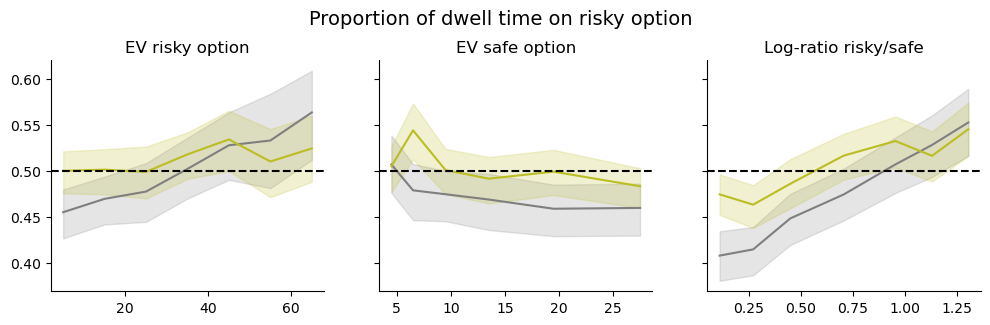

In [366]:
fig, ax = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(12, 3)
ax
g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_risky)']).mean().reset_index(), x='bin(EV_risky)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False, ax=ax[0])
g.set(xlabel=None, title='EV risky option')
sns.despine()

plt.ylabel(None)
g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_safe)']).mean().reset_index(), x='bin(EV_safe)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False, ax=ax[1])
g.set(xlabel=None, title='EV safe option')
sns.despine()

plt.ylabel(None)
g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(log(risky/safe))']).mean().reset_index(), x='bin(log(risky/safe))', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False, ax=ax[2])
sns.despine()
g.set(xlabel=None, title='Log-ratio risky/safe')

plt.suptitle('Proportion of dwell time on risky option', y=1.05, size=14)
ax[0].set_ylabel(None)

for a in ax:
    a.axhline(0.5, c='k', ls='--')

plt.savefig(op.join(target_dir, 'prop_dwell_time.pdf'), bbox_inches='tight')

[Text(0.5, 24.140624999999993, ''), Text(0.5, 1.0, 'test')]

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/516035574.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_safe)']).mean().reset_index(), x='bin(EV_safe)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/516035574.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_safe)']).mean().reset_index(), x='bin(EV_safe)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False)


Text(0.5, 0, 'EV safe option')

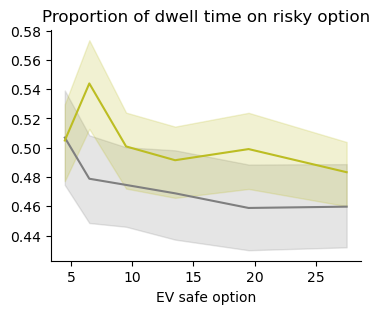

In [330]:
g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(EV_safe)']).mean().reset_index(), x='bin(EV_safe)', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False)
sns.despine()

plt.gcf().set_size_inches(4., 3)
plt.title('Proportion of dwell time on risky option')
plt.ylabel(None)
plt.xlabel('EV safe option')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1928603164.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(log(risky/safe))']).mean().reset_index(), x='bin(log(risky/safe))', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False)
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1928603164.py:1: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(log(risky/safe))']).mean().reset_index(), x='bin(log(risky/safe))', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False)


Text(0.5, 0, 'Log-ratio risky/safe')

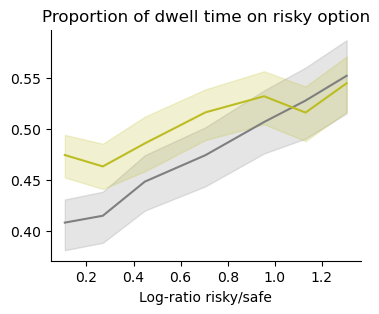

In [333]:
g = sns.lineplot(data=summarized_fixations.groupby(['subject', 'Experiment', 'bin(log(risky/safe))']).mean().reset_index(), x='bin(log(risky/safe))', y='risky_dwelltime_prop', hue='Experiment', palette=palette, legend=False)
sns.despine()

plt.gcf().set_size_inches(4., 3)
plt.title('Proportion of dwell time on risky option')
plt.ylabel(None)
plt.xlabel('Log-ratio risky/safe')

In [302]:
def get_qcut(x):
    try:
        return pd.qcut(x, 3, labels=['low', 'medium', 'high'])
    except ValueError:
        return pd.Series([np.nan]*len(x), index=x.index)

In [303]:
summarized_fixations['risky_dwelltime_split'] = summarized_fixations.groupby(['subject', 'Experiment', 'n_safe'], group_keys=False)['risky_dwelltime_prop'].apply(get_qcut)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/4264656733.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = summarized_fixations.groupby(['subject', 'Experiment', 'n_safe', 'risky_dwelltime_split']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/4264656733.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.catplot(x='n_safe', y='chose_risky', hue='risky_dwelltime_split', data=tmp.reset_index(), kind='point', ci=68, aspect=1.5, col='Experiment')


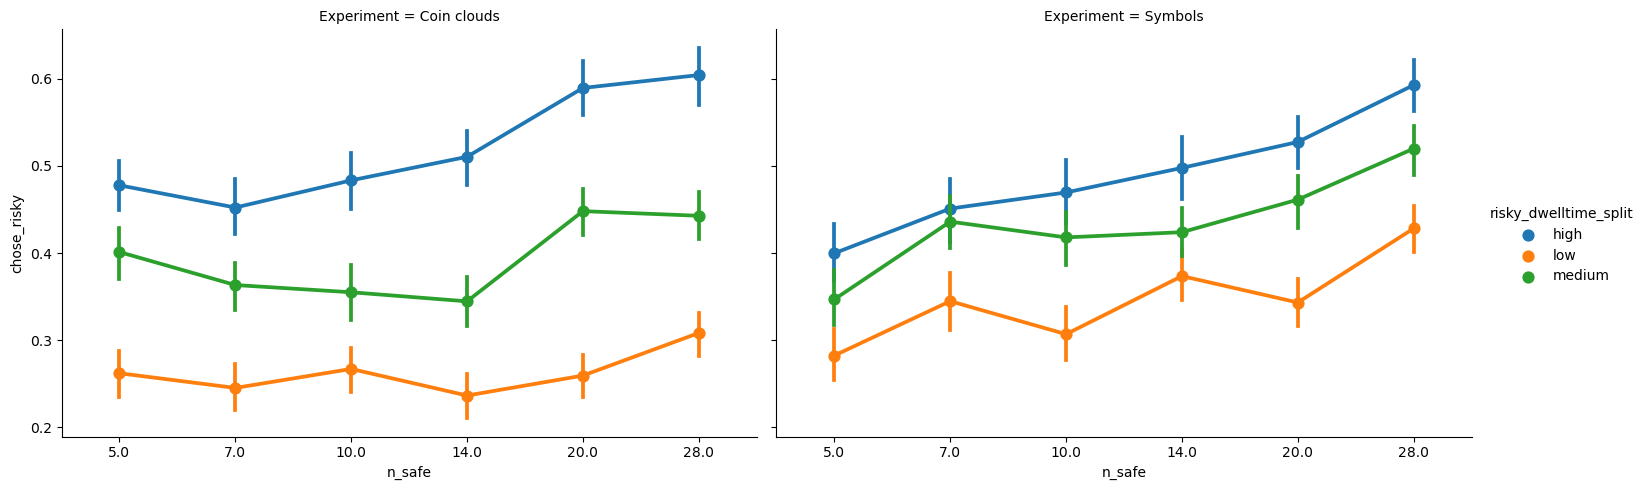

In [305]:
tmp = summarized_fixations.groupby(['subject', 'Experiment', 'n_safe', 'risky_dwelltime_split']).mean()

sns.catplot(x='n_safe', y='chose_risky', hue='risky_dwelltime_split', data=tmp.reset_index(), kind='point', ci=68, aspect=1.5, col='Experiment')
# sns

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_76965/1761606217.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = summarized_fixations.groupby(['subject', 'Experiment', 'n_safe', 'risky_dwelltime_split', 'log(risky/safe)']).mean()


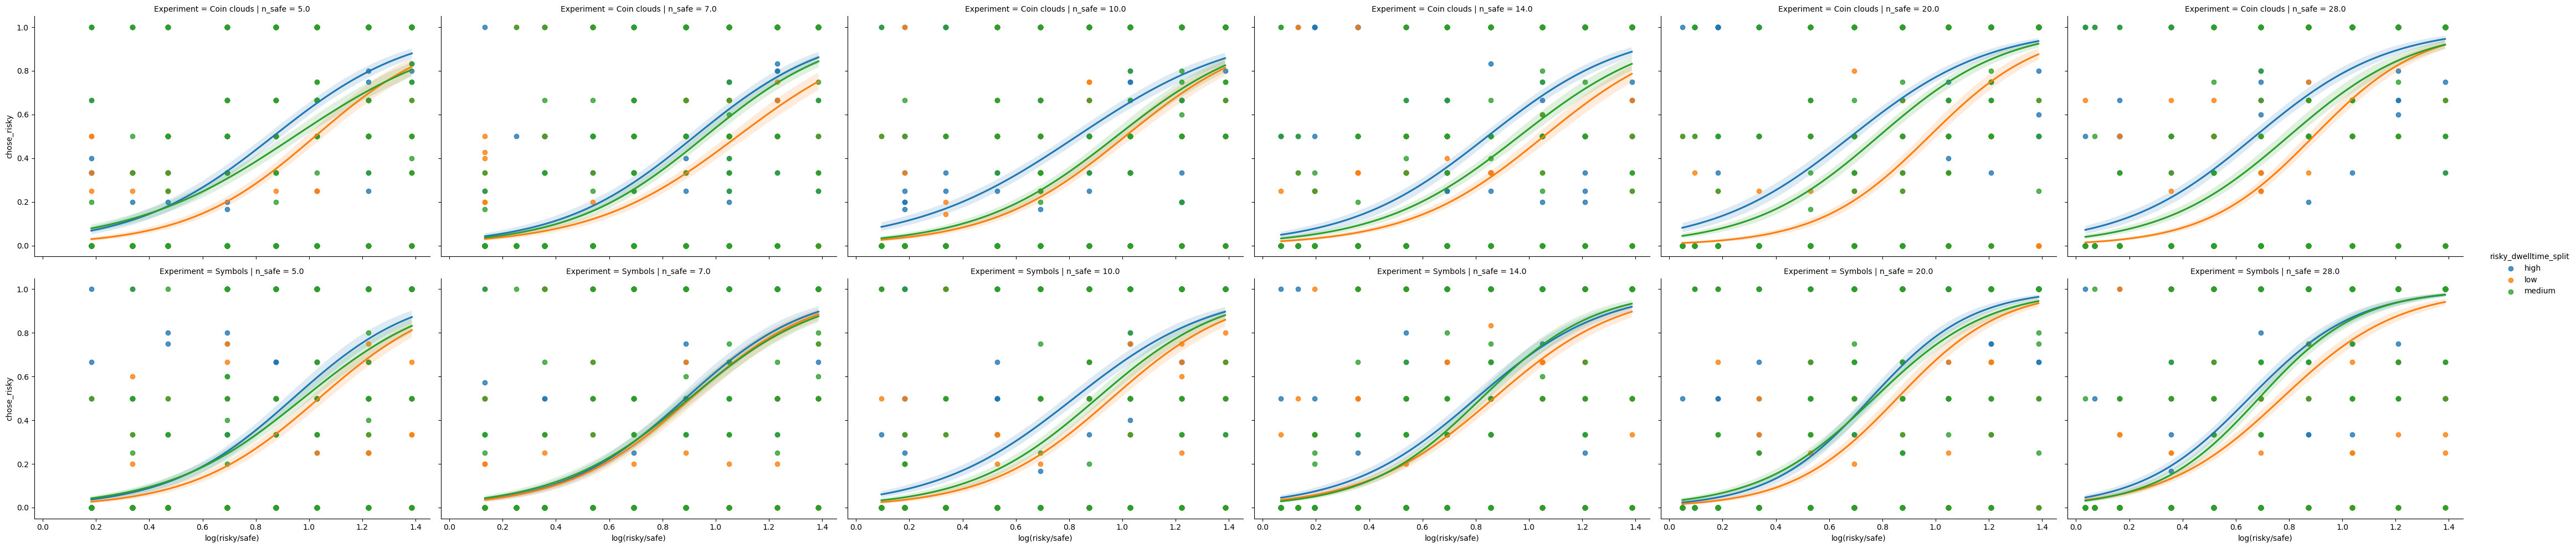

In [307]:
tmp = summarized_fixations.groupby(['subject', 'Experiment', 'n_safe', 'risky_dwelltime_split', 'log(risky/safe)']).mean()

sns.lmplot(x='log(risky/safe)', y='chose_risky', hue='risky_dwelltime_split', data=tmp.reset_index(), row='Experiment', ci=68, aspect=1.5, col='n_safe', logistic=True)
# sns

In [ ]:
sns.lmplot(x='log(risky/safe)', col='n_safe', hue='')
